# **Task 1** Car_Insurance_Claim Data

* ### Import the libraries and classes

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Read and Clean

* ### Read Dataset

In [337]:
df = pd.read_csv("Car_Insurance_Claim.csv")

In [338]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [339]:
df.shape

(10000, 19)

In [340]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [342]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


# Null Value Handling

In [343]:
df.duplicated().sum()
#df.drop_duplicates()

0

In [344]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [345]:
df.isna().sum()*100/len(df)

ID                     0.00
AGE                    0.00
GENDER                 0.00
RACE                   0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64

In [346]:
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median(), inplace=True) 

C:\Users\Nayana D\AppData\Local\Temp\ipykernel_11036\4220012454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median(), inplace=True)


In [347]:
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median(), inplace=True) 

C:\Users\Nayana D\AppData\Local\Temp\ipykernel_11036\578015798.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median(), inplace=True)


In [348]:
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

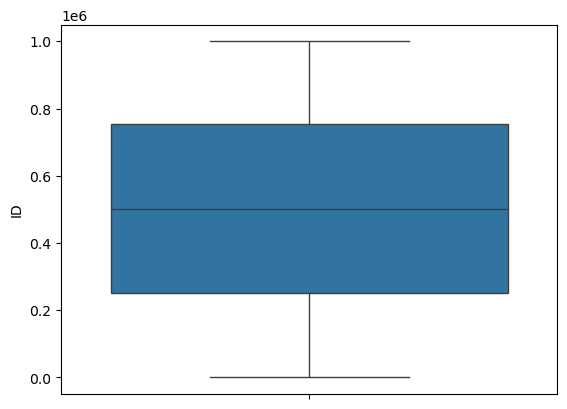

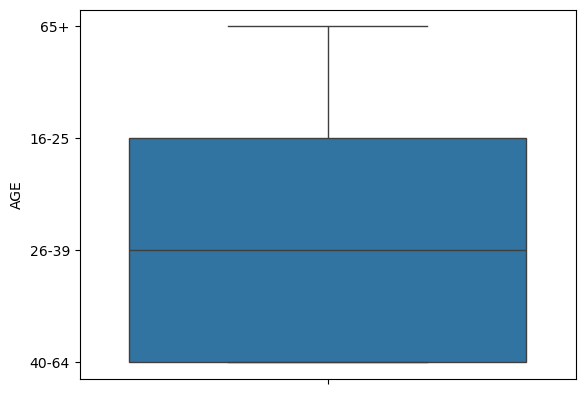

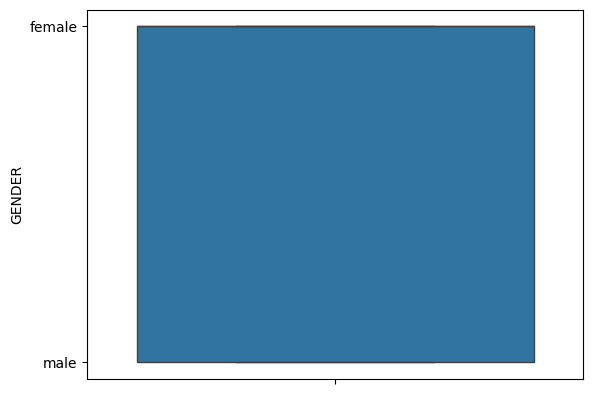

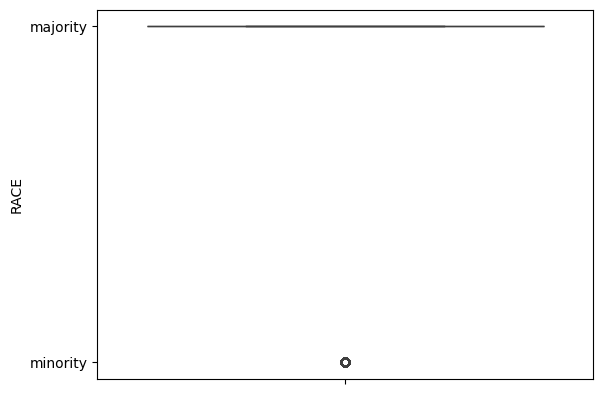

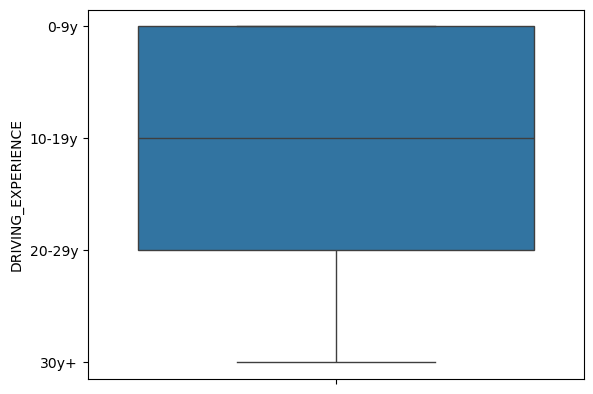

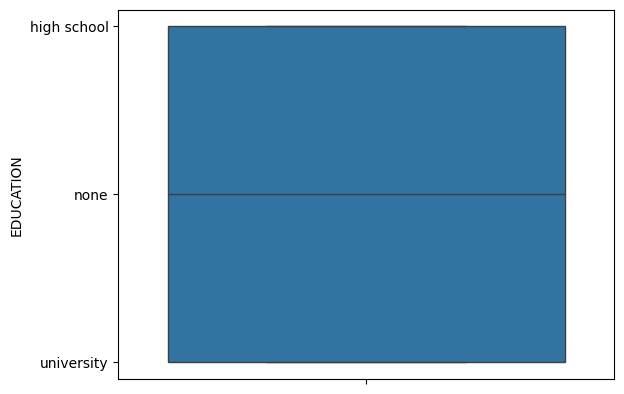

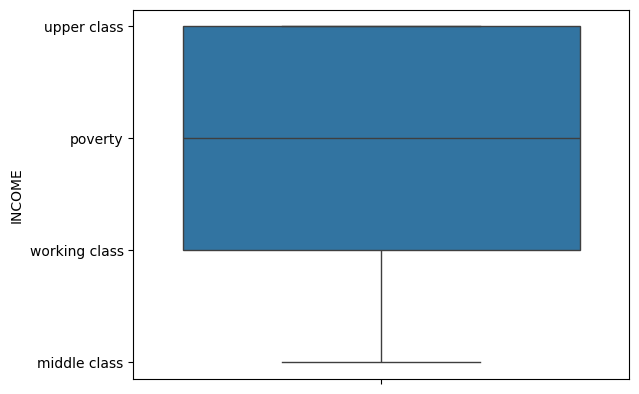

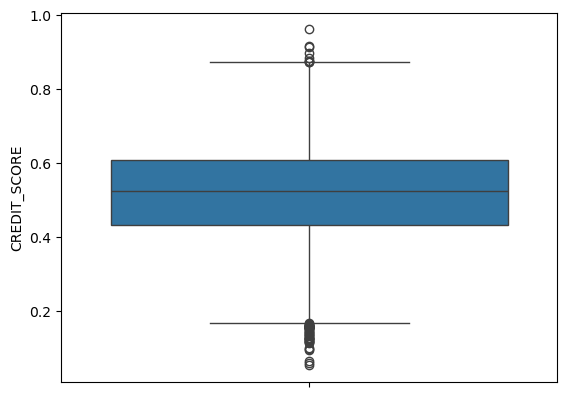

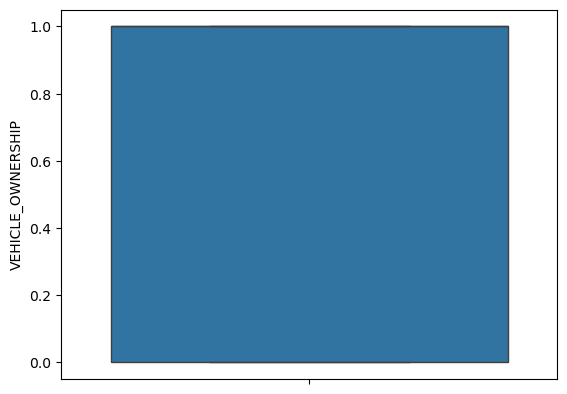

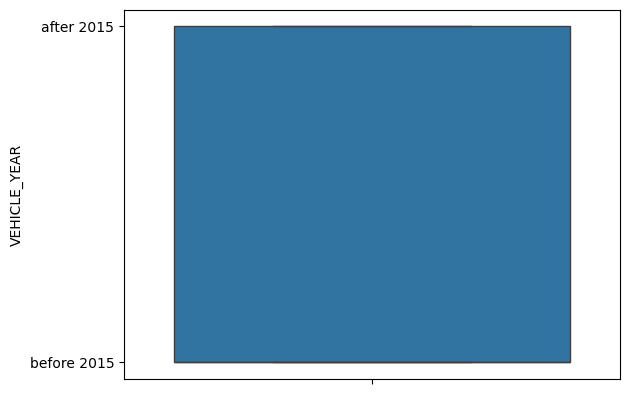

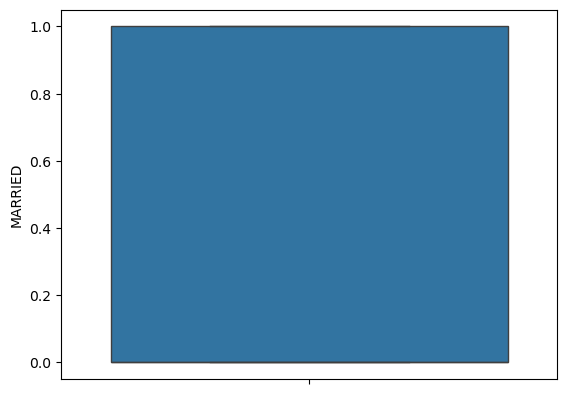

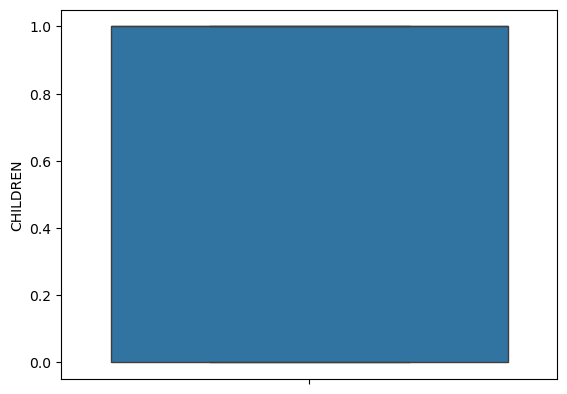

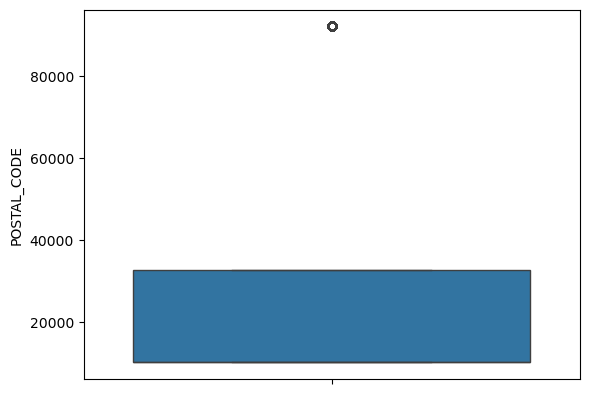

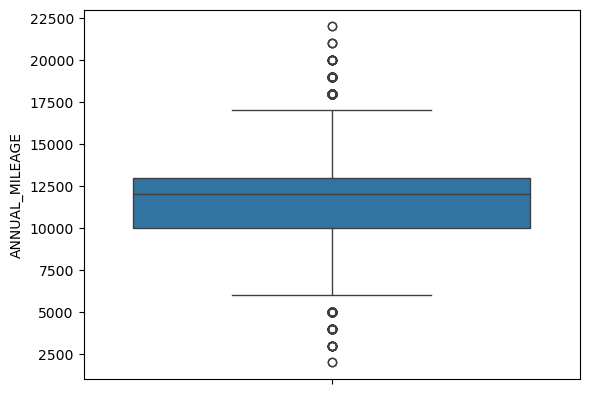

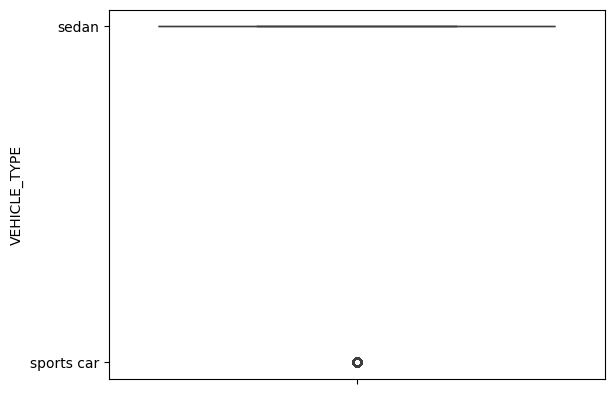

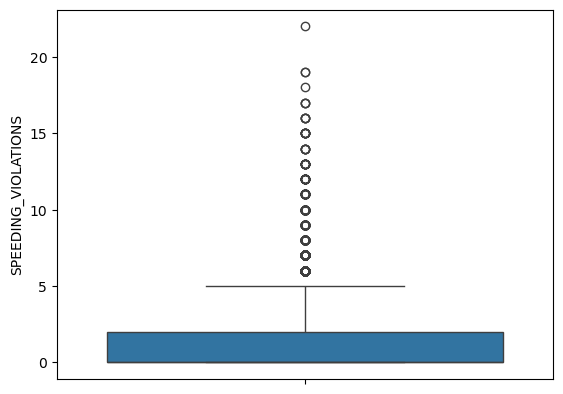

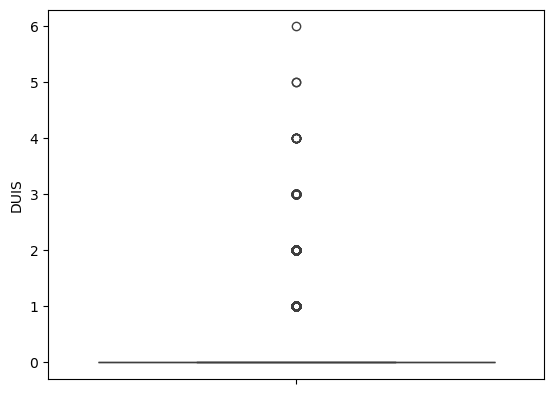

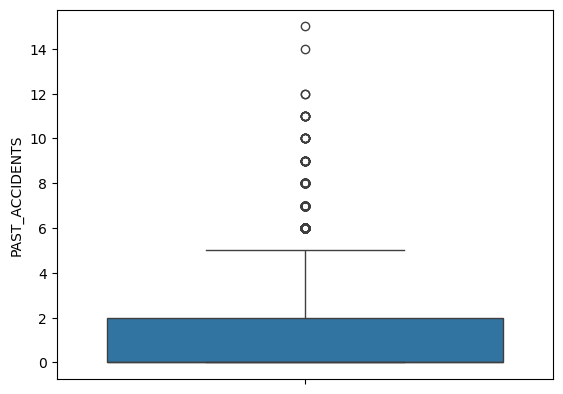

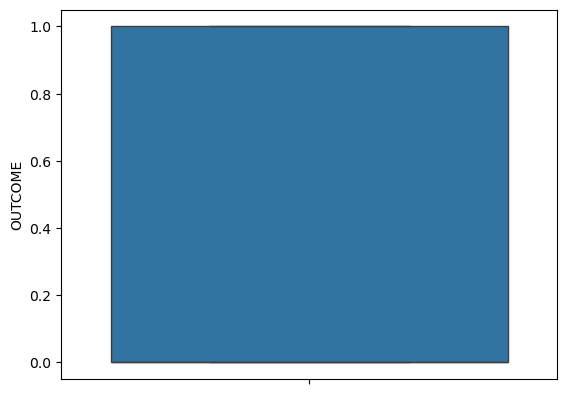

In [349]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()
    print('\n')

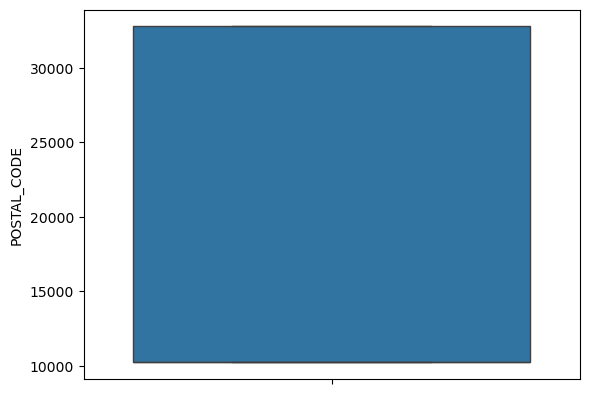

In [350]:
df.drop(df[df['POSTAL_CODE'] >= 80000].index, inplace=True)
sns.boxplot(df['POSTAL_CODE'])
plt.show()

### Visualization

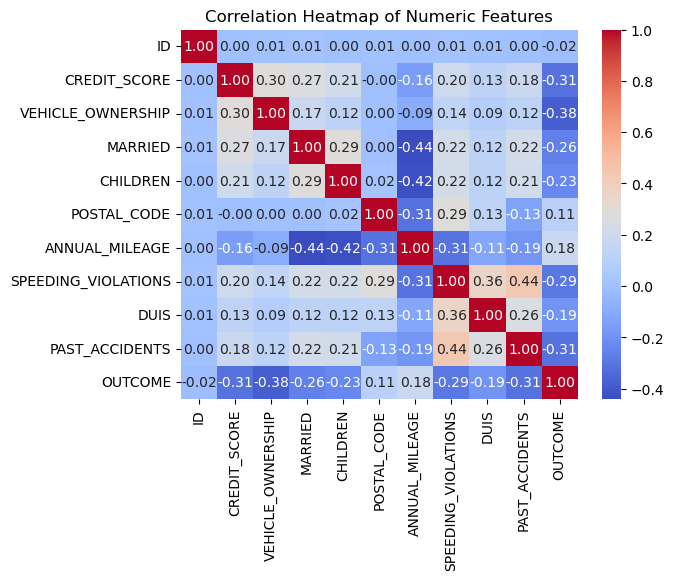

In [351]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

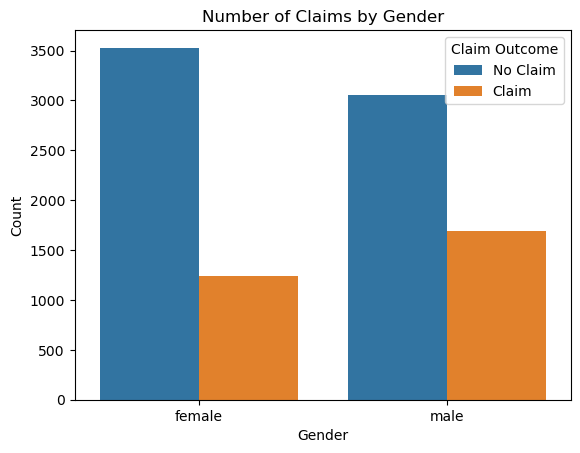

In [352]:
sns.countplot(x='GENDER', hue='OUTCOME', data=df)
plt.title('Number of Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Claim Outcome', labels=['No Claim', 'Claim'])

Text(0, 0.5, 'Average Annual Mileage')

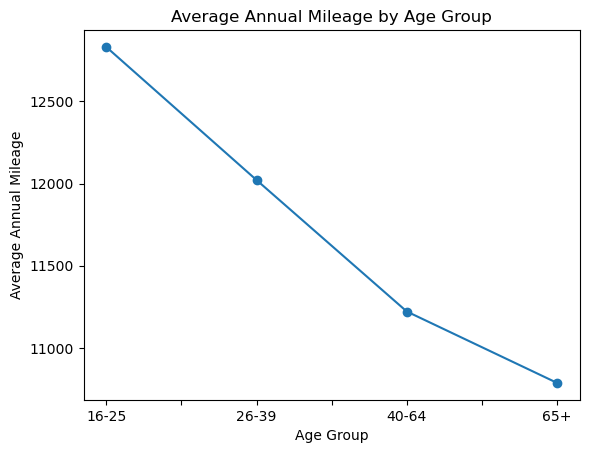

In [353]:
avg_mileage_by_age = df.groupby('AGE')['ANNUAL_MILEAGE'].mean().sort_index()
avg_mileage_by_age.plot(marker='o')
plt.title('Average Annual Mileage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Mileage')

Text(0.5, 1.0, 'Vehicle Type Distribution')

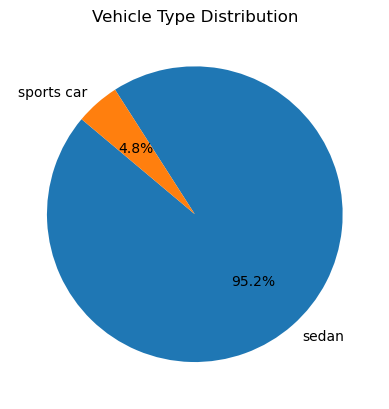

In [354]:
vehicle_counts = df['VEHICLE_TYPE'].value_counts()
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Type Distribution')

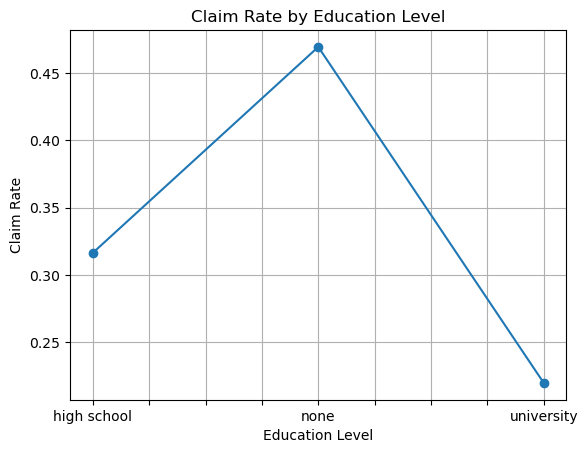

In [355]:
claim_rate_by_edu = df.groupby('EDUCATION')['OUTCOME'].mean()
claim_rate_by_edu.plot(kind='line', marker='o')
plt.title('Claim Rate by Education Level')
plt.ylabel('Claim Rate')
plt.xlabel('Education Level')
plt.grid(True)
plt.show()

 # Encoding

In [356]:
for i in df.columns:
    print(df[i].unique())
    print('-'*100)
    print(df[i].value_counts())
    print('*'*100)

[569520 750365 199901 ... 468409 903459 442696]
----------------------------------------------------------------------------------------------------
ID
569520    1
623736    1
191690    1
621115    1
440868    1
         ..
768953    1
901362    1
846536    1
144925    1
442696    1
Name: count, Length: 9516, dtype: int64
****************************************************************************************************
['65+' '16-25' '26-39' '40-64']
----------------------------------------------------------------------------------------------------
AGE
26-39    2930
40-64    2771
16-25    1919
65+      1896
Name: count, dtype: int64
****************************************************************************************************
['female' 'male']
----------------------------------------------------------------------------------------------------
GENDER
female    4766
male      4750
Name: count, dtype: int64
*************************************************************************

In [357]:
le = LabelEncoder()
df['RACE'] = le.fit_transform(df['RACE'])

le2 = LabelEncoder()
df['EDUCATION'] = le2.fit_transform(df['EDUCATION'])

le3 = LabelEncoder()
df['INCOME'] = le3.fit_transform(df['INCOME'])

In [358]:
ohe1 = OneHotEncoder(sparse_output=False)
ohe1.fit(df[['AGE']])  
col1 = ohe1.get_feature_names_out(['AGE'])
df1 = pd.DataFrame(ohe1.transform(df[['AGE']]), columns=col1)

In [359]:
ohe2 = OneHotEncoder(sparse_output=False)
ohe2.fit(df[['GENDER']])
col2 = ohe2.get_feature_names_out(['GENDER'])
df2 = pd.DataFrame(ohe2.transform(df[['GENDER']]),columns=col2)

In [360]:
ohe3 = OneHotEncoder(sparse_output=False)
ohe3.fit(df[['DRIVING_EXPERIENCE']])
col3 = ohe3.get_feature_names_out(['DRIVING_EXPERIENCE'])
df3 = pd.DataFrame(ohe3.transform(df[['DRIVING_EXPERIENCE']]),columns=col3)

In [361]:
ohe4 = OneHotEncoder(sparse_output=False)
ohe4.fit(df[['VEHICLE_YEAR']])
col4 = ohe4.get_feature_names_out(['VEHICLE_YEAR'])
df4 = pd.DataFrame(ohe4.transform(df[['VEHICLE_YEAR']]),columns=col4)

In [362]:
ohe5 = OneHotEncoder(sparse_output=False)
ohe5.fit(df[['VEHICLE_TYPE']])
col5 = ohe5.get_feature_names_out(['VEHICLE_TYPE'])
df5 = pd.DataFrame(ohe5.transform(df[['VEHICLE_TYPE']]),columns=col5)

In [363]:
df = pd.concat([df,df1,df2,df3,df4,df5], axis=1)

In [364]:
df.drop(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], axis=1, inplace=True)

In [365]:
df.dropna(inplace=True)

In [366]:
df.dtypes

ID                           float64
RACE                         float64
EDUCATION                    float64
INCOME                       float64
CREDIT_SCORE                 float64
VEHICLE_OWNERSHIP            float64
MARRIED                      float64
CHILDREN                     float64
POSTAL_CODE                  float64
ANNUAL_MILEAGE               float64
SPEEDING_VIOLATIONS          float64
DUIS                         float64
PAST_ACCIDENTS               float64
OUTCOME                      float64
AGE_16-25                    float64
AGE_26-39                    float64
AGE_40-64                    float64
AGE_65+                      float64
GENDER_female                float64
GENDER_male                  float64
DRIVING_EXPERIENCE_0-9y      float64
DRIVING_EXPERIENCE_10-19y    float64
DRIVING_EXPERIENCE_20-29y    float64
DRIVING_EXPERIENCE_30y+      float64
VEHICLE_YEAR_after 2015      float64
VEHICLE_YEAR_before 2015     float64
VEHICLE_TYPE_sedan           float64
V

# Feature scaling

In [367]:
sd = StandardScaler()

sd.fit(df)
stand = sd.transform(df)

In [368]:
df.head()

,ID,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,GENDER_female,GENDER_male,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,569520.0,0.0,0.0,2.0,0.629027,1.0,0.0,1.0,10238.0,12000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,750365.0,0.0,1.0,1.0,0.357757,0.0,0.0,0.0,10238.0,16000.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,199901.0,0.0,0.0,3.0,0.493146,1.0,0.0,0.0,10238.0,11000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,478866.0,0.0,2.0,3.0,0.206013,1.0,0.0,1.0,32765.0,11000.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,731664.0,0.0,1.0,3.0,0.388366,1.0,0.0,0.0,32765.0,12000.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
